---
title: "Iris Neural Network Training"
author: "Laura Vairus"
date: "06-21-2023"
---

In [329]:
# importing packages

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [330]:

# defining NN

class Net(nn.Module):
    def __init__(self, layer_sizes):
        super(Net, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = len(layer_sizes) - 1

        # Create hidden layers
        for i in range(self.num_layers):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
        
        # output layer
        self.layers.append(nn.Sigmoid())

    def forward(self, x):
        for i in range(self.num_layers):
            x = torch.relu(self.layers[i](x))

        return x


In [331]:
# defining dataset

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        L = self.x.shape[0]
        return L

    def __getitem__(self, i):
        return (self.x[i, :], self.y[i])


In [332]:
# getting data

iris = datasets.load_iris() # all data

data = torch.from_numpy(iris.data).float() # splitting into data tensors (X)
target = torch.from_numpy(iris.target).long() # and target tensors (Y)

# splitting dataset into training and testing groups
trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.1, random_state=42)
# X is data/attributes
# Y is targets/labels

# making data a Dataset object
trainDataset = MyDataset(trainX, trainY)
testDataset = MyDataset(testX, testY)

# putting Dataset into Loader
trainLoader = DataLoader(trainDataset, batch_size=8, shuffle=False)
# testLoader = DataLoader(testDataset, batch_size=4, shuffle=True)


In [333]:
layer_sizes = [4, 40, 40, 40, 3]  # Input size, hidden layer sizes, output size
net = Net(layer_sizes)
net

Net(
  (layers): ModuleList(
    (0): Linear(in_features=4, out_features=40, bias=True)
    (1-2): 2 x Linear(in_features=40, out_features=40, bias=True)
    (3): Linear(in_features=40, out_features=3, bias=True)
    (4): Sigmoid()
  )
)

In [334]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [335]:
# training NN

nepochs = 5000
epoch_loss = []
test_loss = []

for epoch in range(nepochs):
    net.train()
    iter_loss = 0
    dt_size = 0
    for i, (bX, bY) in enumerate(trainLoader):
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(bX)
        loss = criterion(output, bY)
        loss.backward()
        optimizer.step()
        #print(f'iteration {i}: loss {loss.item()}')
        iter_loss += loss.item()*bX.shape[0]
        dt_size += bX.shape[0]
    epoch_loss.append(iter_loss/dt_size)
    
    net.eval() # tell the network you want to evaluate
    with torch.no_grad():
        output = net(testX)
        loss = criterion(output, testY)
        test_loss.append(loss.item())

    
    # print(f'epoch {epoch}: loss {iter_loss/(i+1)}')

    # print(loss)
    # epoch_loss


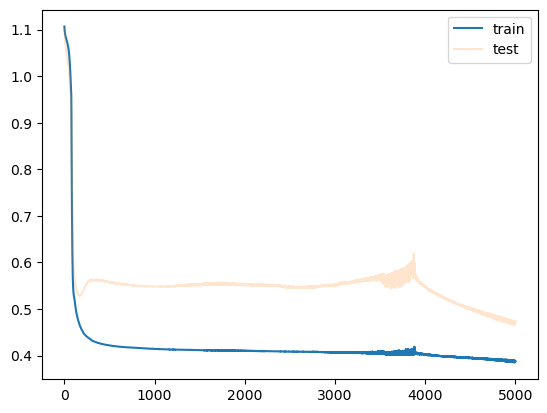

In [336]:
import matplotlib.pyplot as plt
#plt.plot(epoch_loss)

plt.plot(epoch_loss, label='train')
plt.plot(test_loss, label='test', alpha=0.2)
plt.legend(loc="upper right")

In [337]:
# testing NN

print("testing")
optimizer.zero_grad()
output = net(testX)
print(testX.shape)
loss = criterion(output, testY)
print(loss)
# print(output)

testing
torch.Size([15, 4])
tensor(0.4740, grad_fn=<NllLossBackward0>)


In [338]:
# analyzing and printing results

preds = []
for row in output:
    if row.max() == row[0]:
        preds.append(0)
    elif row.max() == row[1]:
        preds.append(1)
    else:
        preds.append(2)
tPreds = torch.tensor(preds).view(15,1)
tTargets = testY.view(15,1)

result = torch.cat([tPreds,tTargets], dim=1)
print(result)
correct = 0
for row in result:
    if row[0] == row[1]:
        correct += 1

print(correct)


tensor([[1, 1],
        [0, 0],
        [2, 2],
        [1, 1],
        [1, 1],
        [0, 0],
        [1, 1],
        [2, 2],
        [1, 1],
        [1, 1],
        [2, 2],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
15
